# Dataset EDA

In [9]:
import json

with open('../data/paper_single_round_1w5_update.jsonl') as file:
    dataset = json.load(file)
    
dataset = [data['conversation'][0] for data in dataset]

In [10]:
print("Total number of papers in the dataset: ", len(dataset))

Total number of papers in the dataset:  15565


Each dataset contains 3 columns: `instruction`, `input`, and `output`. The instruction contains the system prompt for the model, and the input is the paper content. The output is the summarized reviews of the paper.

In [11]:
dataset[0]

{'system': "You are a professional machine learning conference reviewer who reviews a given paper and considers 4 criteria: [Significance and novelty], [Potential reasons for acceptance], [Potential reasons for rejection], and [Suggestions for improvement]. For each criterion, provide random number of supporting points derived from the paper's content. And for each supporting point, use the format: '<title of supporting point>' followed by a detailed explanation. Your response should only include your reviews only, which means always start with [Significance and novelty], dont' repeat the given paper and output things other than your reviews in required format. The paper is given as follows:",
 'input': '[TITLE]\nImage Quality Assessment Techniques Improve Training and Evaluation of Energy-Based Generative Adversarial Networks\n\n[ABSTRACT]\nWe propose a new, multi-component energy function for energy-based Generative Adversarial Networks (GANs) based on methods from the image quality 

## Average Number of Words

In [12]:
lengths = []
for data in dataset:
    instruction = data['system']
    input = data['input']
    output = data['output']
    
    len_instruction = len(instruction.split())
    len_input = len(input.split())
    len_output = len(output.split())
    
    sum_len = len_instruction + len_input + len_output
    lengths.append(sum_len)
    
print("Average number of words in the dataset: ", sum(lengths)/len(lengths))

Average number of words in the dataset:  5679.193639575972


Following the rule of thumb is that one token generally corresponds to ~4 characters of text for common English text. This translates to roughly ¾ of a word (so 100 tokens ~= 75 words). We can use this to estimate the average number of tokens.

In [13]:
token2word_ratio = 4/3
print("Average number of tokens in the dataset: ", sum(lengths)/len(lengths) * token2word_ratio)
print("Max number of tokens in the dataset: ", max(lengths) * token2word_ratio)

Average number of tokens in the dataset:  7572.258186101296
Max number of tokens in the dataset:  10488.0


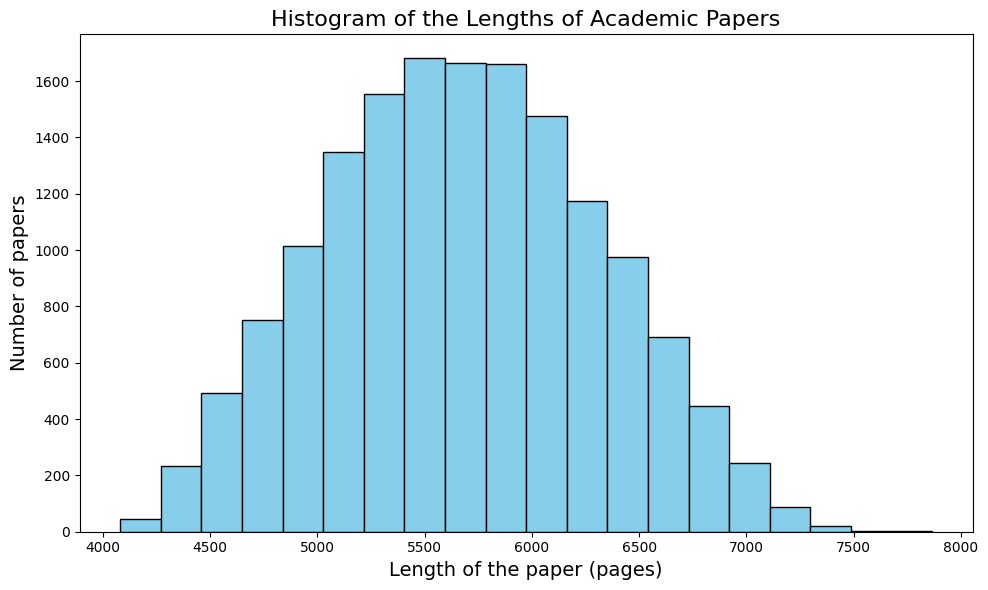

In [16]:
# draw a histogram of the lengths
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Length of the paper (pages)', fontsize=14)
plt.ylabel('Number of papers', fontsize=14)
plt.title('Histogram of the Lengths of Academic Papers', fontsize=16)
plt.grid(False)
plt.tight_layout()
plt.show()

# Preprocess Dataset

In [17]:
from datasets import Dataset

random_seed = 42

In [18]:
dataset = Dataset.from_list(dataset)

In [19]:
def create_conversation(sample):
    return {
        "messages": [
            {"role": "system", "content": sample['system']},
            {"role": "user", "content": sample["input"]},
            {"role": "assistant", "content": sample["output"]}
        ]
    }


In [ ]:
dataset = dataset.map(create_conversation, remove_columns=dataset.features, batched=False)

In [21]:
print(dataset[0]["messages"])

[{'content': "You are a professional machine learning conference reviewer who reviews a given paper and considers 4 criteria: [Significance and novelty], [Potential reasons for acceptance], [Potential reasons for rejection], and [Suggestions for improvement]. For each criterion, provide random number of supporting points derived from the paper's content. And for each supporting point, use the format: '<title of supporting point>' followed by a detailed explanation. Your response should only include your reviews only, which means always start with [Significance and novelty], dont' repeat the given paper and output things other than your reviews in required format. The paper is given as follows:", 'role': 'system'}, {'content': '[TITLE]\nImage Quality Assessment Techniques Improve Training and Evaluation of Energy-Based Generative Adversarial Networks\n\n[ABSTRACT]\nWe propose a new, multi-component energy function for energy-based Generative Adversarial Networks (GANs) based on methods 

## Split to Train, Validation, and Test

In [22]:
train_valid_dataset = dataset.train_test_split(test_size=0.2, seed=random_seed)

In [23]:
train_valid_dataset

DatasetDict({
    train: Dataset({
        features: ['messages'],
        num_rows: 12452
    })
    test: Dataset({
        features: ['messages'],
        num_rows: 3113
    })
})

In [34]:
valid_dataset = train_valid_dataset['test'].train_test_split(test_size=0.2, seed=random_seed)

In [29]:
valid_dataset

DatasetDict({
    train: Dataset({
        features: ['messages'],
        num_rows: 2490
    })
    test: Dataset({
        features: ['messages'],
        num_rows: 623
    })
})

In [33]:
valid_dataset

Dataset({
    features: ['messages'],
    num_rows: 2490
})

In [35]:
train_valid_dataset['train'].to_json("../data/train_dataset.json", orient="records", lines=True)
valid_dataset['train'].to_json("../data/valid_dataset.json", orient="records", lines=True)
valid_dataset['test'].to_json("../data/test_dataset.json", orient="records", lines=True)

Creating json from Arrow format:   0%|          | 0/13 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

22182584